In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [53]:
img=plt.imread("blood.jpeg")
r,g,b=cv2.split(img)
min1=g.min()
max1=g.max()
mod=cv2.normalize(g, g, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
#mod=[ for i in g

counter=0
for i in g:
    mod[counter]=((i-min1)/max1-min1)*255
    counter=counter+1

#blur = cv2.GaussianBlur(mod,(5,5),0)
ret,th1 =cv2.threshold(mod,100,255,cv2.THRESH_BINARY)
comple=cv2.bitwise_not(th1)


kernel = np.ones((3,3), np.uint8)

kernel1 = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(comple, kernel, iterations=1)

edge=cv2.Canny(img_erosion,10,200)

img_dilation = cv2.dilate(edge, kernel1, iterations=1)


# hist = cv2.calcHist([mod], [0], None, [256], [0, 256])
# plt.figure()
# plt.title(" Histogram MOD")
# plt.xlabel("Bins")
# plt.ylabel("# of Pixels")
# plt.plot(hist)
# plt.xlim([0, 256])
# plt.show()


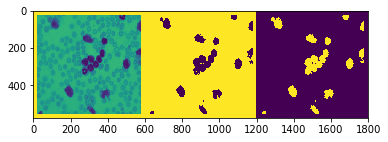

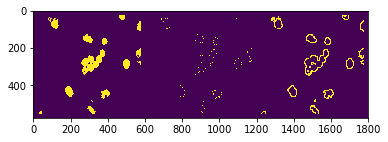

True

In [54]:
res=np.hstack([mod,th1,comple])
res1=np.hstack([img_erosion,edge,img_dilation])
final=np.hstack([res,res1])
plt.imshow(res)
plt.show()
plt.imshow(res1)
plt.show()

cv2.imwrite('wbc.png',final)

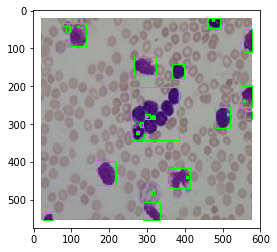

31

In [115]:
import cv2
import numpy as np

im2,contours,hierarchy = cv2.findContours(comple, 1, 2)
#cnt = contours[0]
for cnt in contours:
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
# print (M)
# print (area)
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
plt.imshow(img)
plt.show()
avg_area=area/(len(contours))
len(contours)

In [26]:
img=plt.imread("blood.jpeg")
r,g,b=cv2.split(img)
min1=g.min()
max1=g.max()
mod=cv2.normalize(g, g, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
#mod=[ for i in g]
counter=0
for i in g:
    mod[counter]=((i-min1)/max1-min1)*255
    counter=counter+1

blur = cv2.GaussianBlur(mod,(15,15),0)
ret,th2 =cv2.threshold(blur,140,255,cv2.THRESH_BINARY)
comple1=cv2.bitwise_not(th2)

sub=cv2.subtract(comple1,comple)
#sub=cv2.subtract(sub,img_dilation)

kernel11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
sub = cv2.morphologyEx(sub,cv2.MORPH_OPEN,kernel11)


kernel = np.ones((3,3), np.uint8)

# img_erosion = cv2.erode(comple, kernel, iterations=1)

edge1=cv2.Canny(sub,10,20)

img_dilation1 = cv2.dilate(edge1, kernel, iterations=1)



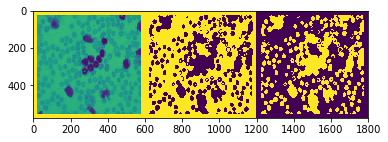

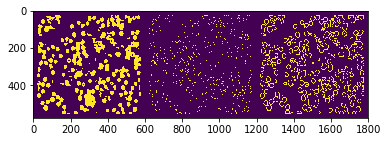

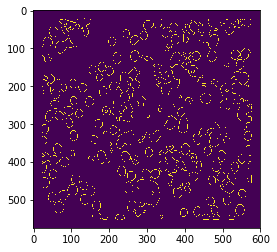

True

In [17]:
res=np.hstack([mod,th2,comple1])
res1=np.hstack([sub,edge1,img_dilation1])
final=np.hstack([res,res1])
plt.imshow(res)
plt.show()
plt.imshow(res1)
plt.show()
plt.imshow(edge1)
plt.show()
cv2.imwrite('rbc.png',final)

176 RBC Detected 


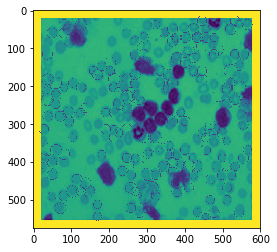

True

In [101]:
#p=cv2.imread('blood.jpeg',0)
#greys = cv2.cvtColor(p,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(sub,cv2.HOUGH_GRADIENT,11,10,param1=50,param2=55,minRadius=6,maxRadius=21)
# ensure at least some circles were found
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

counter=0
# loop over the (x, y) coordinates and radius of the circles
for (x, y, r) in circles:
    
    cv2.circle(g, (x, y), r, (55, 255, 10), 1)
    counter+=1
    #cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

    
print ('{} RBC Detected '.format(counter))
plt.imshow(g)
plt.show()
res=np.hstack([g,sub])
cv2.imwrite("rbc_de.png",res)

[INFO] 142 unique contours found
142 RBC Detected 


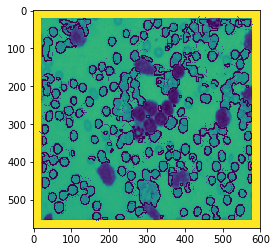

True

In [102]:
# find contours in the thresholded image
cnts = cv2.findContours(sub.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
print("[INFO] {} unique contours found".format(len(cnts)))
 
# loop over the contours
counter=0
for (i, c) in enumerate(cnts):
# draw the contour
    ((x, y), _) = cv2.minEnclosingCircle(c)
    #cv2.putText(g, "#{}".format(i + 1), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    cv2.drawContours(g, [c], -1, (0, 255, 0), 2)
    counter+=1
 
# show the output image
print ('{} RBC Detected '.format(counter))
plt.imshow(g)
plt.show()
res=np.hstack([g,sub])
cv2.imwrite("rbc_ws.png",res)

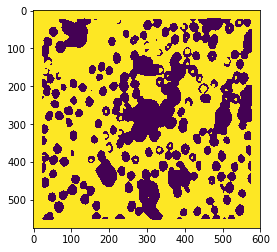

In [20]:
plt.imshow(th2)
plt.show()

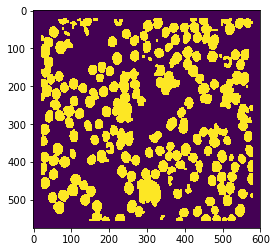

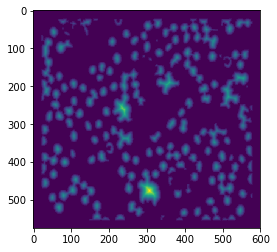

189 RBC Detected 


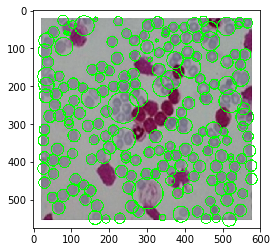

True

In [139]:
from scipy import ndimage
from skimage.feature import peak_local_max
from skimage.morphology import watershed


image = cv2.imread("blood.jpeg")
shifted = image#cv2.pyrMeanShiftFiltering(image, 21, 51)

# plt.imshow(shifted)
# plt.show()
 
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
b,g,r=cv2.split(image)
thresh = cv2.threshold(g, 150, 255,cv2.THRESH_BINARY )[1]


sub1=cv2.subtract(th1,thresh)
ss=sub1
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(6,6))
sub1 = cv2.morphologyEx(sub1,cv2.MORPH_OPEN,kernel)

sub1=flood_fill(sub1)

plt.imshow(sub1)
plt.show()

D = ndimage.distance_transform_edt(sub1)
localMax = peak_local_max(D, indices=False, min_distance=15,labels=sub1)
 
plt.imshow(D)
plt.show()
counter=0
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=sub1)
#print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))


for label in np.unique(labels):
# if the label is zero, we are examining the 'background'
# so simply ignore it
    if label == 0:
        continue
 
# otherwise, allocate memory for the label region and draw
# it on the mask
    mask = np.zeros(g.shape, dtype="uint8")
    mask[labels == label] = 255
    
 
# # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    c = max(cnts, key=cv2.contourArea)
#     #print (c)
 
# draw a circle enclosing the object
    #for (i, c) in enumerate(cnts):
# draw the contour
    
    ((x, y), r) = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
    counter+=1

print ('{} RBC Detected '.format(counter))
plt.imshow(image)
plt.show()
cv2.imwrite("rbc_ws1.png",image)

In [132]:
import numpy as np
import scipy as sp
import scipy.ndimage

def flood_fill(test_array,h_max=255):
    input_array = np.copy(test_array) 
    el = sp.ndimage.generate_binary_structure(2,1).astype(np.int)
    inside_mask = sp.ndimage.binary_erosion(~np.isnan(input_array), structure=el)
    output_array = np.copy(input_array)
    output_array[inside_mask]=h_max
    output_old_array = np.copy(input_array)
    output_old_array.fill(0)   
    el = sp.ndimage.generate_binary_structure(2,1).astype(np.int)
    while not np.array_equal(output_old_array, output_array):
        output_old_array = np.copy(output_array)
        output_array = np.maximum(input_array,sp.ndimage.grey_erosion(output_array, size=(2,1), footprint=el))
    return output_array

In [ ]:
labels.shape

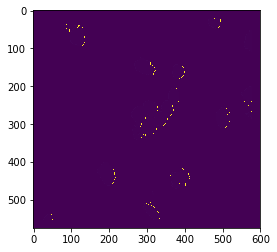

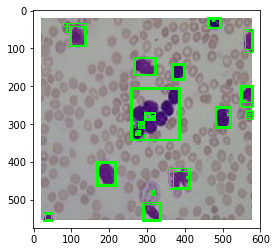

In [16]:

plt.imshow()
plt.show()
plt.imshow(img)
plt.show()